In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Text Mining/FinalBalancedDataset.csv")
data.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [6]:
data['Toxicity'].value_counts()

0    32592
1    24153
Name: Toxicity, dtype: int64

In [7]:
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [8]:
data.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


**Data Visualization (Toxic)**

In [9]:
from wordcloud import WordCloud

In [11]:
allWords = ' '.join([twts for twts in data['tweet']])

In [12]:
allWords

Output hidden; open in https://colab.research.google.com to view.

In [16]:
wordCloud = WordCloud(width=700, height=400, max_font_size=110).generate(allWords)

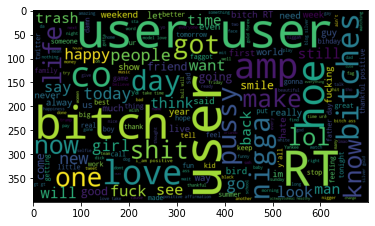

In [17]:
plt.imshow(wordCloud)

**Data Visualization (Non-Toxic)**

In [18]:
data[data['Toxicity'] == 0]

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56676,0,wondertrade is the best pokemon feature ever. ...
56683,0,wth is that playing missy? ........ i mean ser...
56697,0,yay I like when jacob has colored layouts
56698,0,yaya ho.. cute avi tho RT @ViVaLa_Ari I had no...


In [23]:
allWords = ' '.join([twts for twts in data[data['Toxicity'] == 0]['tweet']])

In [26]:
wordCloud = WordCloud(width=700, height=400, max_font_size=110).generate(allWords)

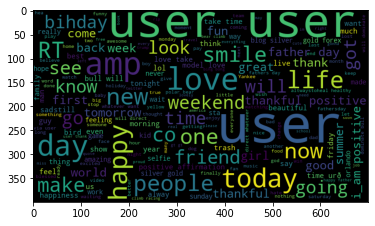

In [27]:
plt.imshow(wordCloud)

**Cleaning Data**

In [29]:
X = data['tweet'].copy()
y = data['Toxicity'].copy()

In [49]:
import re
from nltk.corpus import stopwords

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [72]:
def data_cleaner(data):
  data = data.lower()
  data = re.sub(r'http\S+',' ',data)
  data = re.sub(r'<.*?>',' ',data)
  data = re.sub(r'<.*?>',' ',data)
  data = re.sub(r'#\w+',' ',data)
  data = re.sub(r'@\w+',' ',data)
  data = re.sub('[^A-Za-z0-9 ]','',data)
  data = ' '.join([word for word in data.split() if not word in stop_words])
  return data

In [64]:
stop_words = stopwords.words('english')

In [74]:
X_cleaned = X.apply(data_cleaner)
X_cleaned

0        father dysfunctional selfish drags kids dysfun...
1        thanks credit cant use cause dont offer wheelc...
2                                           bihday majesty
3                                    love u take u time ur
4                                       factsguide society
                               ...                        
56740    yous muthafin lie right tl trash mine bible sc...
56741    youve gone broke wrong heart baby drove rednec...
56742    young buck wanna eat dat nigguh like aint fuck...
56743                    youu got wild bitches tellin lies
56744    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 56745, dtype: object

**Tokenizing**

*Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa.*

In [75]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [95]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_cleaned)

X = tokenizer.texts_to_sequences(X_cleaned)
vocab_size = len(tokenizer.word_index) + 1

print(f'Vocab size: {vocab_size}')
print(f'Sentences: {X_cleaned[2]}')
print(f'After: {X[2]}')

Vocab size: 35825
Sentences: bihday majesty
After: [74, 4639]


In [96]:
X = pad_sequences(X, padding="post")
print(f'After padding: {X[2]}')

After padding: [  74 4639    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]


**Train Test Split**

In [108]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

**Training Model**

In [99]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as L

In [111]:
model = tf.keras.Sequential(
    [
     L.Embedding(vocab_size, 64, input_length=X.shape[1]),
     L.LSTM(256),
     L.Dense(512, activation='sigmoid'),
     L.Dense(2,activation='softmax')
    ]
)

In [112]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 64)            2292800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 2,754,114
Trainable params: 2,754,114
Non-trainable params: 0
_________________________________________________________________


In [113]:
history = model.fit(X_train,y_train, epochs=5, validation_split=0.15, batch_size=64)

Epoch 1/5
603/603 [==============================] - 95s 154ms/step - loss: 0.2998 - accuracy: 0.8626 - val_loss: 0.1907 - val_accuracy: 0.9266
Epoch 2/5
603/603 [==============================] - 92s 153ms/step - loss: 0.1282 - accuracy: 0.9553 - val_loss: 0.1945 - val_accuracy: 0.9282
Epoch 3/5
603/603 [==============================] - 93s 153ms/step - loss: 0.0847 - accuracy: 0.9732 - val_loss: 0.2772 - val_accuracy: 0.9219
Epoch 4/5
603/603 [==============================] - 92s 153ms/step - loss: 0.0625 - accuracy: 0.9806 - val_loss: 0.2718 - val_accuracy: 0.9214
Epoch 5/5
603/603 [==============================] - 93s 154ms/step - loss: 0.0491 - accuracy: 0.9839 - val_loss: 0.2928 - val_accuracy: 0.9204


**Prediction Data Test**

In [114]:
predicted = np.argmax(model.predict(X_test),axis=1)
predicted

array([1, 1, 0, ..., 0, 0, 0])

In [115]:
from sklearn.metrics import classification_report

In [116]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6560
           1       0.92      0.89      0.91      4789

    accuracy                           0.92     11349
   macro avg       0.92      0.92      0.92     11349
weighted avg       0.92      0.92      0.92     11349



In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
confusion_matrix(y_test, predicted)

array([[6211,  349],
       [ 528, 4261]])